In [ ]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Buscando dados

In [ ]:
google = yahooFinance.Ticker('GOOG')

# dados dos ultimos 5 anos
df = google.history('5Y')

#### Apresentação inicial das informações

In [14]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-14 00:00:00-05:00,52.499001,53.130001,52.039501,52.105000,33732000,0.0,0.0
2018-12-17 00:00:00-05:00,51.875500,52.657501,50.395000,50.826500,47708000,0.0,0.0
2018-12-18 00:00:00-05:00,51.304501,52.473999,51.071999,51.435501,43850000,0.0,0.0
2018-12-19 00:00:00-05:00,51.699501,53.099998,50.402500,51.150501,49586000,0.0,0.0
2018-12-20 00:00:00-05:00,50.906502,51.710999,49.818001,50.470501,53470000,0.0,0.0


In [15]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-08 00:00:00-05:00,135.660004,137.990005,135.570007,136.639999,22990900,0.0,0.0
2023-12-11 00:00:00-05:00,133.820007,134.789993,132.889999,134.699997,24502900,0.0,0.0
2023-12-12 00:00:00-05:00,133.270004,134.539993,132.830002,133.639999,26584000,0.0,0.0
2023-12-13 00:00:00-05:00,134.544998,134.779999,132.949997,133.970001,25414500,0.0,0.0
2023-12-14 00:00:00-05:00,134.770004,135.035004,131.065002,132.755005,19592183,0.0,0.0


In [17]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,97.872995,99.012550,96.852625,97.954873,2.931195e+07,0.0,0.015886
std,30.234743,30.513703,29.923280,30.204868,1.293372e+07,0.0,0.563660
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,68.123749,69.339302,67.482750,68.498249,2.107660e+07,0.0,0.000000
50%,99.129997,100.610001,97.800003,99.300003,2.625600e+07,0.0,0.000000
75%,125.661526,126.722500,124.622475,125.724998,3.321500e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


### Visão geral do preço de fechamento antes do cálculo DMA (Acesso Direto ao Mercado) 

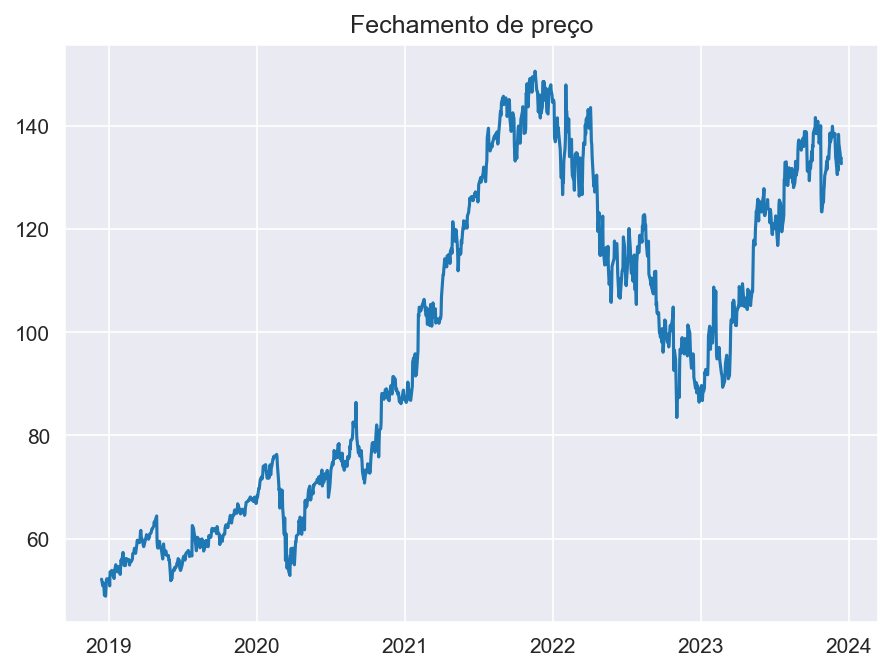

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Fechamento de preço')
plt.plot(df['Close'])

Calcular média de 50 DMA e 200 DMA

In [25]:
df['fiftyDMA'] = df['Close'].rolling(50).mean()
df['thDMA'] = df['Close'].rolling(200).mean()

df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,97.872995,99.012550,96.852625,97.954873,2.931195e+07,0.0,0.015886,98.129892,98.834906
std,30.234743,30.513703,29.923280,30.204868,1.293372e+07,0.0,0.563660,29.270200,26.228014
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,53.799780,57.328883
25%,68.123749,69.339302,67.482750,68.498249,2.107660e+07,0.0,0.000000,69.009142,70.940352
50%,99.129997,100.610001,97.800003,99.300003,2.625600e+07,0.0,0.000000,98.063100,102.598109
75%,125.661526,126.722500,124.622475,125.724998,3.321500e+07,0.0,0.000000,124.665395,120.527428
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


Removendo colunas desnecessária

In [26]:
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2018-12-14 00:00:00-05:00,52.499001,53.130001,52.039501,52.105000,33732000,NaN,NaN
2018-12-17 00:00:00-05:00,51.875500,52.657501,50.395000,50.826500,47708000,NaN,NaN
2018-12-18 00:00:00-05:00,51.304501,52.473999,51.071999,51.435501,43850000,NaN,NaN
2018-12-19 00:00:00-05:00,51.699501,53.099998,50.402500,51.150501,49586000,NaN,NaN
2018-12-20 00:00:00-05:00,50.906502,51.710999,49.818001,50.470501,53470000,NaN,NaN


Fechamento de Preço vs 50DMA vs 200DMA

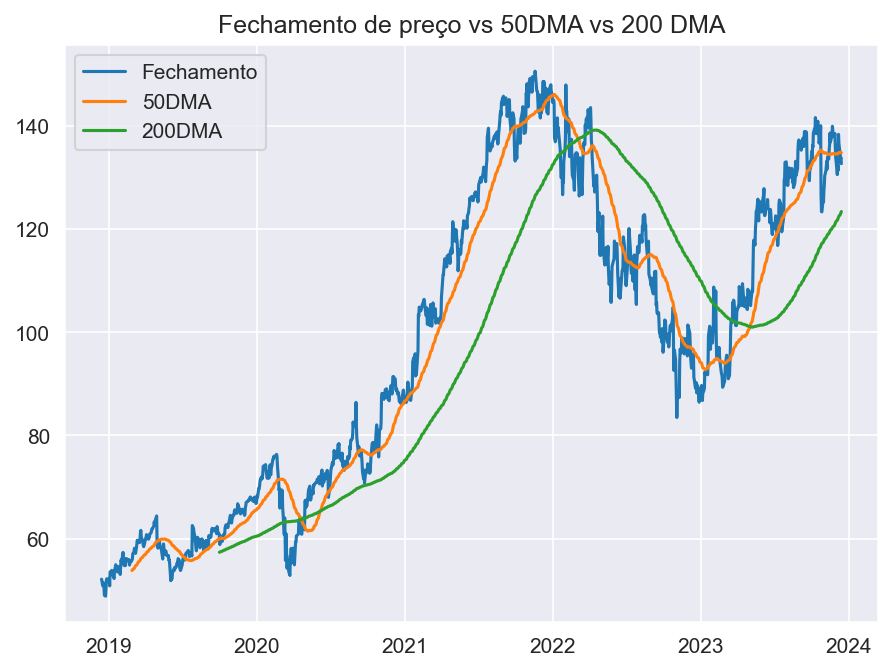

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.title('Fechamento de preço vs 50DMA vs 200 DMA')
plt.plot(df['Close'], label='Fechamento')
plt.plot(df['fiftyDMA'], label='50DMA')
plt.plot(df['thDMA'], label='200DMA')
plt.legend()
